# 개념도

- Ref: https://cpm0722.github.io/pytorch-implementation/transformer
- Transformer 개괄적 구조 및 역할
 * Seq 형태의 input을 사용해 seq 형태의 ouput을 만들어내는 함수

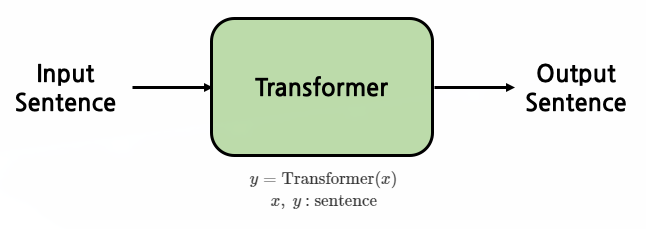

- Encoder의 개괄적 구조 및 역할
 * Seq 를 input으로 받아와 하나의 vector 생성
 * 이 때 Vector는 context라고 부르는데, seq의 정보들을 빠뜨리지 않고 압축하는 것을 목표로 학습
 
 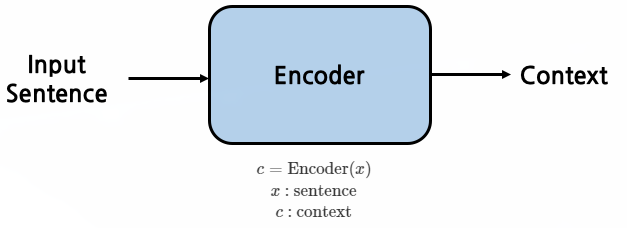
 
- Decoder의 개괄적 구조 및 역할
 * Seq를 right shift한 seq와 vector (context) 를 input으로 받아와 ouput 생성 
 
 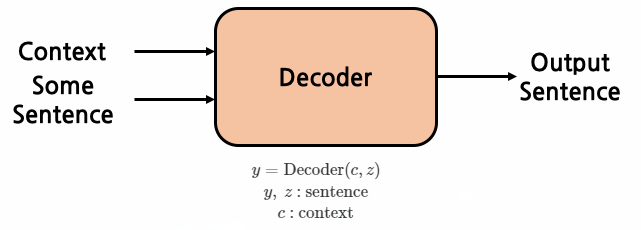
 

# 코딩

## Transformer model

In [ ]:
class Transformer(nn.Module):
    
    def __init__(self, encoder, decoder):
        super(Transformer, self).__init__()
        self.encoder = encoder
        self.decoder = decoder
        
    def forward(self, x, z):
        c = self.encoder
        y = self.decoder(z, c)
        return z
        

## Encoder
- Encoder의 구조 및 내용
 * Encoder layaer가 N개 쌓여진 형태
 * Encoder layer를 겹겹이 쌓아 높은차원 (넓은관점)에서의 context를 담기 위함 
 * 첫번째 encoder layer의 input은 encoder input으로 들어오는 문장 embedding 
 * 각 encoder layer의 input과 output shape 동일 
 * context는 input sentence와 동일한 shape

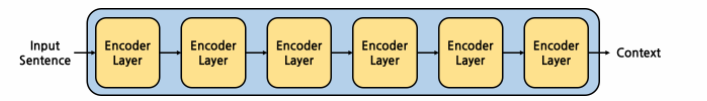

In [ ]:
class Encoder(nn.Module):
    
    def __init__(self, encoder_layer, n_layer): # n_layer: Encoder Layer의 개수
        super(Encoder, self).__init__()
        self.layers = []
        for i in range(n_layer):
            self.layers.append(copy.deepcopy(encoder_layer))
            
    def forward(self, x):
        out = x
        for layer in self.layer:
            out = layer(out)
        return out

### Encoder layer
- Encoder layer는 Multi-Head Attention Layer, Position-wise Feed-Forward Layer로 구성

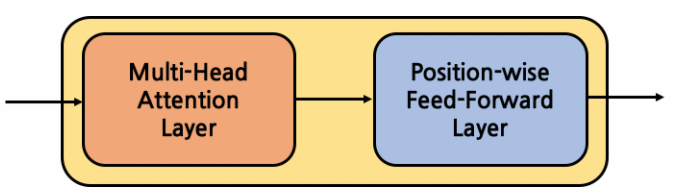

In [ ]:
class EncoderLayer(nn.Module):
    
    def __init__(self, multi_head_attention_layer, position_wise_feed_forward_layer):
        super(EncoderLayer, self).__init__()
        self.multi_head_attention_layer = multi_head_attention_layer
        self.position_wise_feed_forward_layer = position_wise_feed_forward_layer
        
    def forward(self, x):
        out = self.multi_head_attention_layer(x)
        out = self.position_wise_feed_forward_layer(out)
        return out        